In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import panel as pn
import os
from requests import api 
from dotenv import load_dotenv
from pycoingecko import CoinGeckoAPI

In [2]:
pn.extension("plotly")
import plotly.express as px

In [3]:
df_ticker_low = yf.download(['BTC-USD' , 'ETH-USD', 'DOGE-USD', 'ADA-USD', 'MATIC-USD'], period='5y', group_by= 'ticker', dtype= object)
df_ticker_low

[*********************100%***********************]  5 of 5 completed


MATIC-USD                                                        \
                Open      High       Low     Close Adj Close        Volume   
Date                                                                         
2016-07-08       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-09       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-10       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-11       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-12       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-13       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-14       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-15       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-16       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-17       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-18       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-19       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-20       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-21       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-22       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-23       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-24       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-25       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-26       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-27       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-28       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-29       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-30       NaN       NaN       NaN       NaN       NaN           NaN   
2016-07-31       NaN       NaN       NaN       NaN       NaN           NaN   
2016-08-01       NaN       NaN       NaN       NaN       NaN           NaN   
2016-08-02       NaN       NaN       NaN       NaN       NaN           NaN   
2016-08-03       NaN       NaN       NaN       NaN       NaN           NaN   
2016-08-04       NaN       NaN       NaN       NaN       NaN           NaN   
2016-08-05       NaN       NaN       NaN       NaN       NaN           NaN   
2016-08-06       NaN       NaN       NaN       NaN       NaN           NaN   
...              ...       ...       ...       ...       ...           ...   
2021-06-09  1.480070  1.532651  1.356999  1.492427  1.492427  1.819221e+09   
2021-06-10  1.490975  1.497217  1.355368  1.362205  1.362205  1.083382e+09   
2021-06-11  1.363053  1.383839  1.233062  1.251965  1.251965  9.602921e+08   
2021-06-12  1.250332  1.394790  1.163944  1.341269  1.341269  1.585638e+09   
2021-06-13  1.340909  1.492560  1.317858  1.469217  1.469217  1.566746e+09   
2021-06-14  1.465227  1.597355  1.414814  1.477863  1.477863  1.415034e+09   
2021-06-15  1.594380  1.722041  1.534883  1.691460  1.691460  2.287131e+09   
2021-06-16  1.628095  1.636442  1.449416  1.477197  1.477197  1.472817e+09   
2021-06-17  1.478923  1.556963  1.455155  1.503794  1.503794  1.089042e+09   
2021-06-18  1.503763  1.512533  1.307309  1.377261  1.377261  1.233288e+09   
2021-06-19  1.380531  1.433359  1.352048  1.363695  1.363695  8.684412e+08   
2021-06-20  1.360871  1.433974  1.286915  1.398996  1.398996  9.989380e+08   
2021-06-21  1.399662  1.409565  1.084777  1.099052  1.099052  1.483730e+09   
2021-06-22  1.097809  1.235737  0.930163  1.074384  1.074384  2.509625e+09   
2021-06-23  1.075182  1.247964  1.031177  1.158587  1.158587  1.608298e+09   
2021-06-24  1.178167  1.238874  1.137753  1.203148  1.203148  9.165044e+08   
2021-06-25  1.202085  1.232769  1.043918  1.046163  1.046163  9.609024e+08   
2021-06-26  1.040057  1.102386  1

In [4]:
df_closing_prices = pd.DataFrame()
df_closing_prices["BTC"] = df_ticker_low["BTC-USD"]["Close"]
df_closing_prices["ETH"] = df_ticker_low["ETH-USD"]["Close"]
df_closing_prices["DOGE"] = df_ticker_low["DOGE-USD"]["Close"]
df_closing_prices["ADA"] = df_ticker_low["ADA-USD"]["Close"]
df_closing_prices["MATIC"] = df_ticker_low["MATIC-USD"]["Close"]
df_closing_prices.index = df_ticker_low.index.date
df_closing_prices

,BTC,ETH,DOGE,ADA,MATIC
2016-07-08,666.523010,11.394600,0.000277,NaN,NaN
2016-07-09,650.960022,10.965500,0.000270,NaN,NaN
2016-07-10,649.359985,10.947600,0.000272,NaN,NaN
2016-07-11,647.658997,10.459000,0.000267,NaN,NaN
2016-07-12,664.551025,10.516100,0.000265,NaN,NaN
2016-07-13,654.468018,10.500500,0.000263,NaN,NaN
2016-07-14,658.078003,11.513200,0.000262,NaN,NaN
2016-07-15,663.255005,11.951600,0.000264,NaN,NaN
2016-07-16,660.767029,11.652800,0.000262,NaN,NaN
2016-07-17,679.458984,11.158700,0.000263,NaN,NaN



Bad key "text.kerning_factor" on line 4 in
C:\Users\simon\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


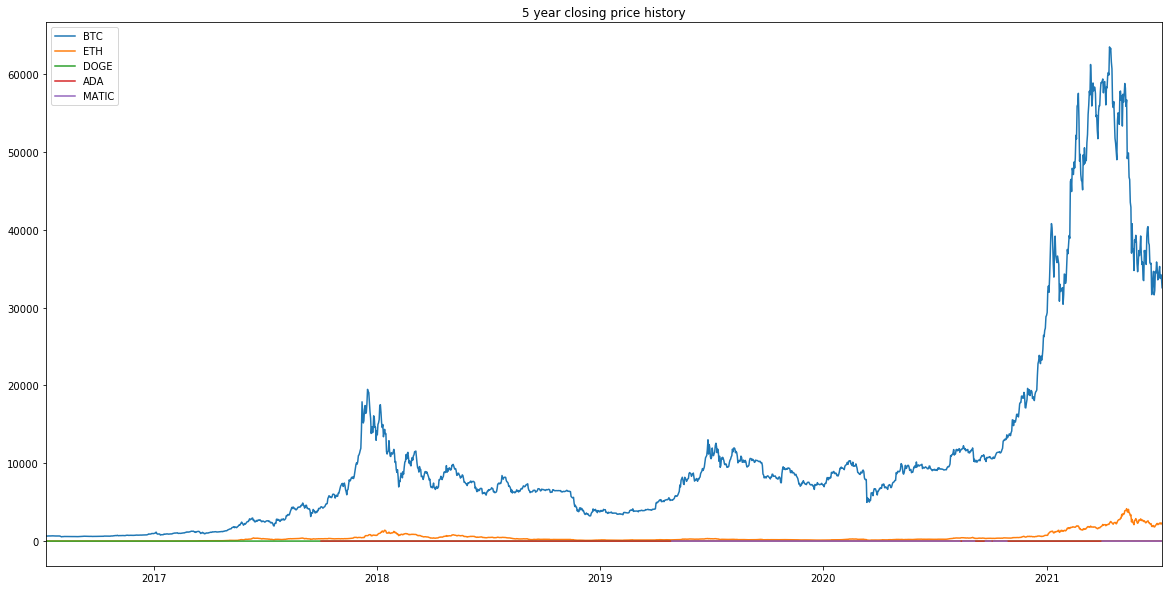

In [5]:
df_closing_prices_plot = df_closing_prices.plot(figsize=(20, 10),title="5 year closing price history")